# Exploring Fair Embedding Engine

In this notebook we will look into all the four modules of the FEE library:
1. Reports (Global and word level)
2. Visualizations
3. Debiasing
4. Metrics

# 1. Reports

In [1]:
import numpy as np
import pandas as pd
import fee
import copy
import matplotlib.pyplot as plt
from fee.embedding import loader
from fee.reports import NeighboursAnalysis, GlobalReport, WordReport #3 types of report

In [2]:
# Refer gensim for a list of models: https://github.com/RaRe-Technologies/gensim-data#models
model_name = 'glove-wiki-gigaword-300'
E = loader.WE().load(
        ename=model_name, 
        normalize=True
    )

In [28]:
report = NeighboursAnalysis(E).generate('nurse')
report

,Neighbour,Bias by projection
0,pregnant,0.376227
1,sister,0.351646
2,housewife,0.328079
3,mother,0.323706
4,her,0.323242
...,...,...
95,medical,0.007221
96,practitioners,0.006074
97,psychiatrist,0.003887
98,accountant,0.003356


Direct bias (Bias by projection on the PCA based gender direction): 0.2515009939670563
Proximity bias (Ratio of biased neighbours by Indirect Bias): 0.31
Neighbour Analysis: 
           Neighbour  Bias by projection
0           pregnant            0.376227
1             sister            0.351646
2             mother            0.323706
3              woman            0.307836
4               maid            0.287063
5            midwife            0.282145
6           filipina            0.281075
7         girlfriend            0.263949
8        housekeeper            0.245811
9       receptionist            0.237638
10          midwives            0.228787
11              wife            0.196644
12     schoolteacher            0.186744
13            nurses            0.170458
14       anesthetist            0.160549
15           nursing            0.149175
16           hospice            0.149094
17         therapist            0.147842
18         pediatric            0.141789
19   

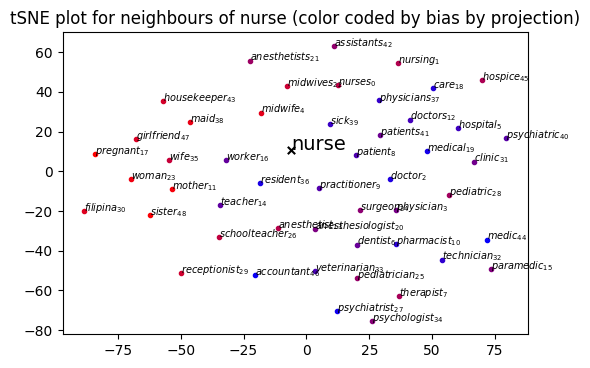

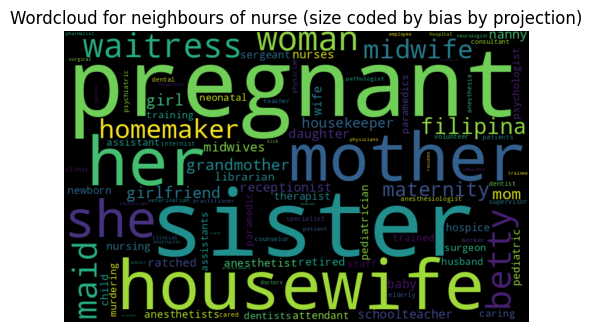

In [4]:
WordReport(E).generate('nurse')

               words  bias by projection
0      bare-breasted            0.452874
1           schorpen            0.431729
2   oly-2004-fhockey            0.420213
3          lactating            0.419348
4          kuppinger            0.412581
..               ...                 ...
95           seacole            0.344846
96     kirchschlager            0.344835
97       tragedienne            0.344722
98            karala            0.344689
99           charima            0.344298

[100 rows x 2 columns] 

            words  bias by projection
0         chosŏn        2.908148e-05
1           osha        2.802070e-05
2       catalans        2.801232e-05
3       hofinger        2.771616e-05
4      fortaleza        2.759881e-05
..           ...                 ...
95  glider-style        2.950430e-06
96      brummies        1.970679e-06
97  unthreatened        1.938082e-06
98        damion        1.579523e-06
99           hap        7.357448e-07

[100 rows x 2 columns]


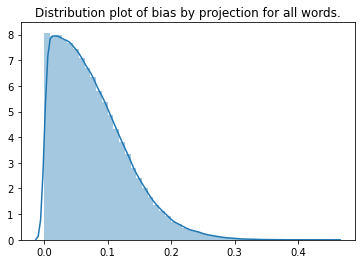

In [5]:
GlobalReport(E).generate(n=100)

# 2. Visualizations

In [6]:
import numpy as np
import pandas as pd
import fee
import matplotlib.pyplot as plt
from fee.embedding import loader
from fee.metrics import DirectBias
from fee.visualize import GCT, PCAComponents, NeighbourPlot, NBWordCloud #4 types of plots

In [7]:
E = loader.WE().load(ename = 'glove-wiki-gigaword-300', normalize=True)
g = fee.utils.get_g(E)

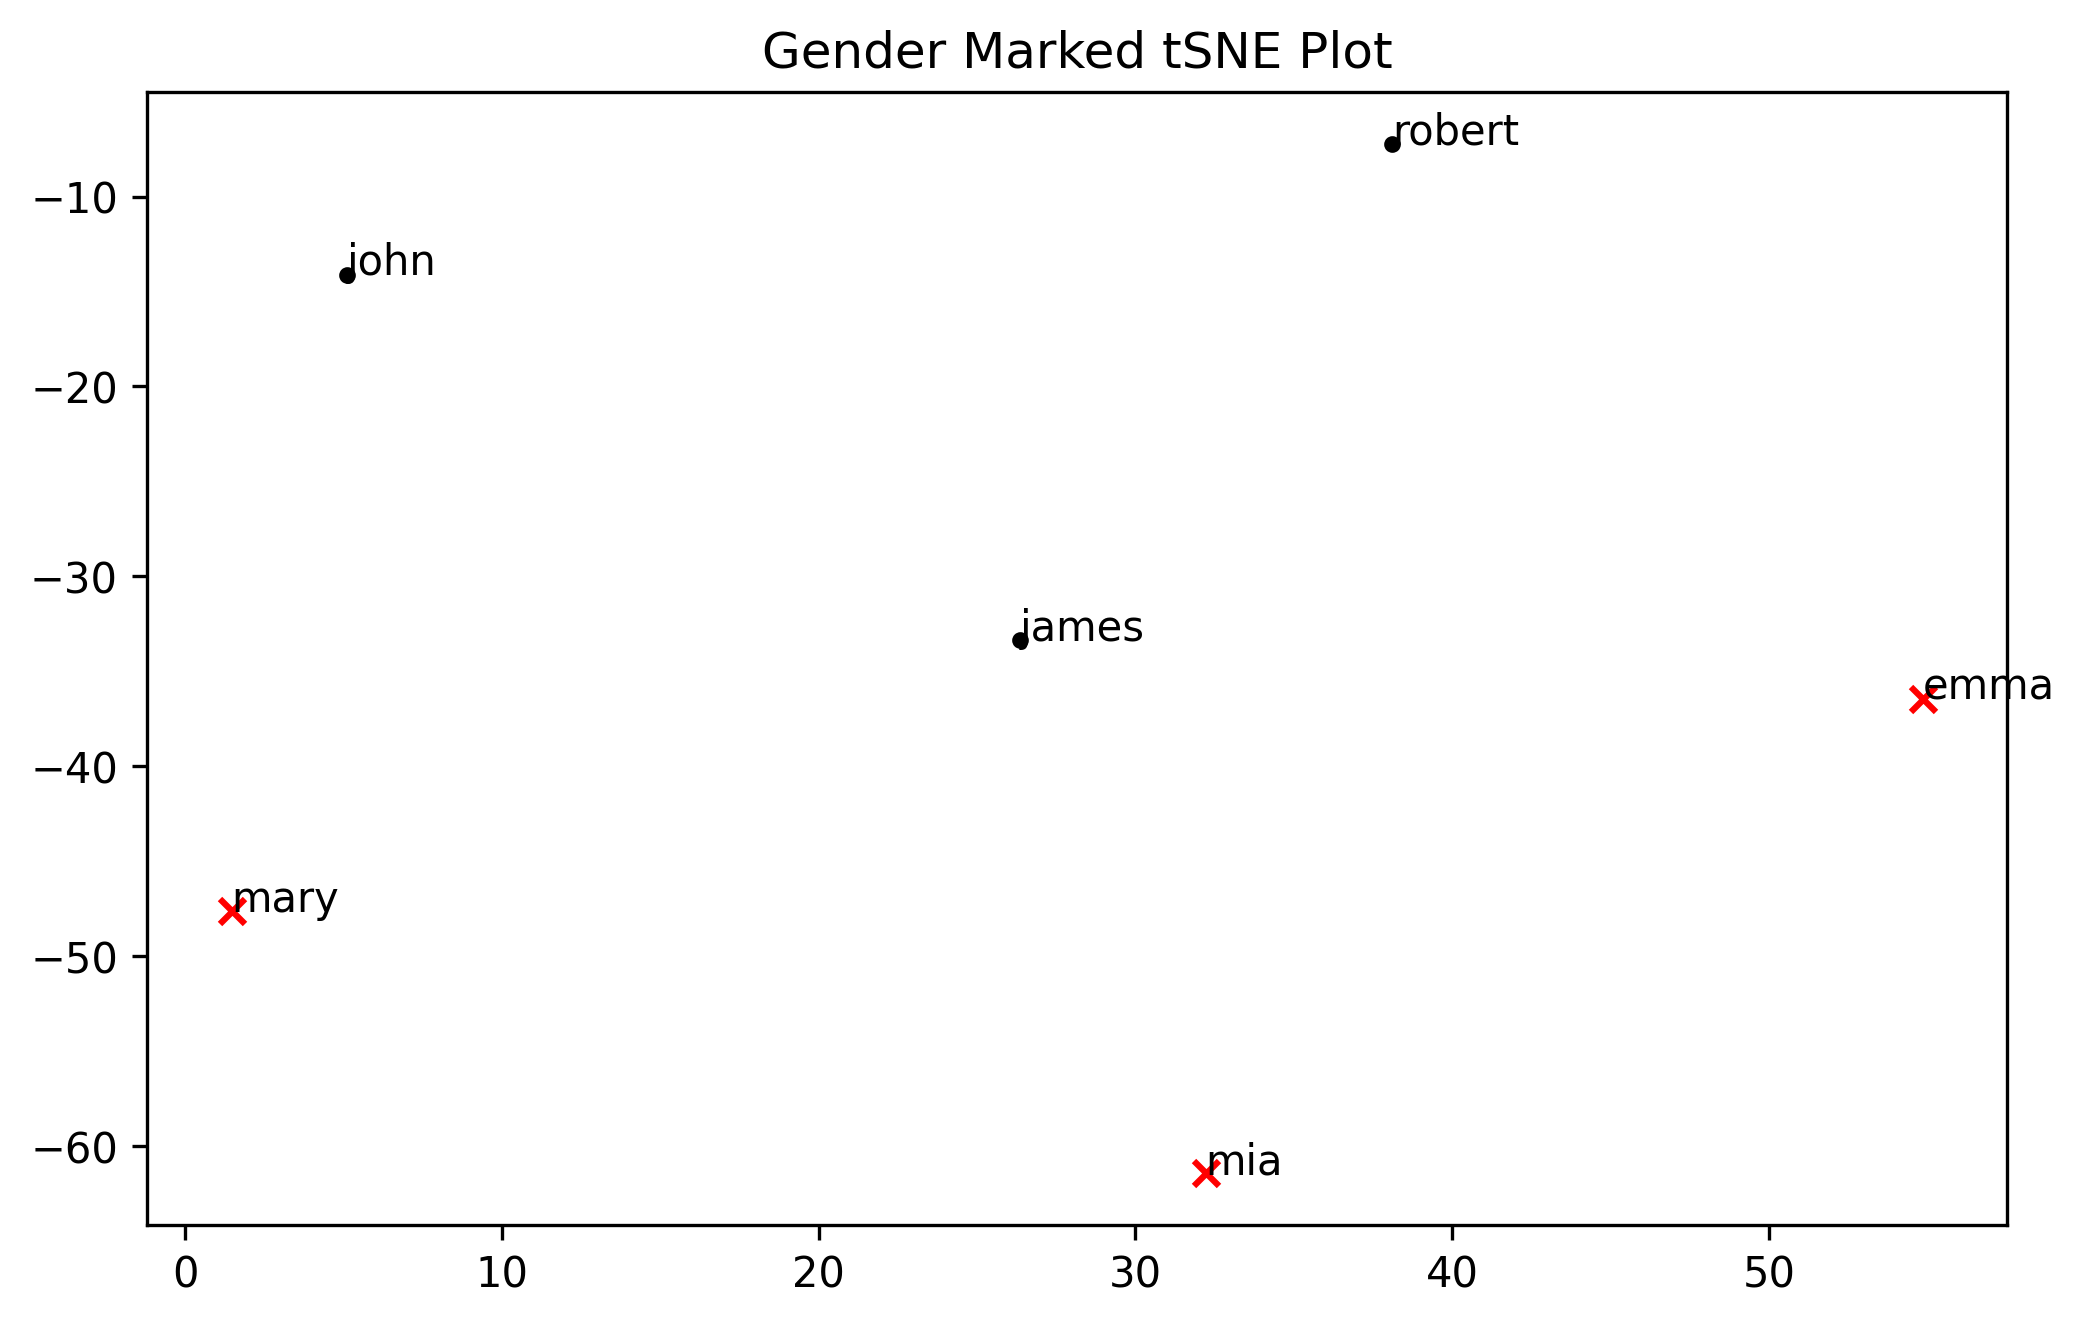

In [8]:
words = "mary emma mia john james robert".split()
GCT(E).run(words, 
           title="Gender Marked tSNE Plot",
           annotate=True)

In [9]:
definitional = [['woman', 'man'],
                ['girl', 'boy'],
                ['she', 'he'],
                ['mother', 'father'],
                ['daughter', 'son'],
                ['gal', 'guy'],
                ['female', 'male'],
                ['her', 'his'],
                ['herself', 'himself'],
                ['mary', 'john']]

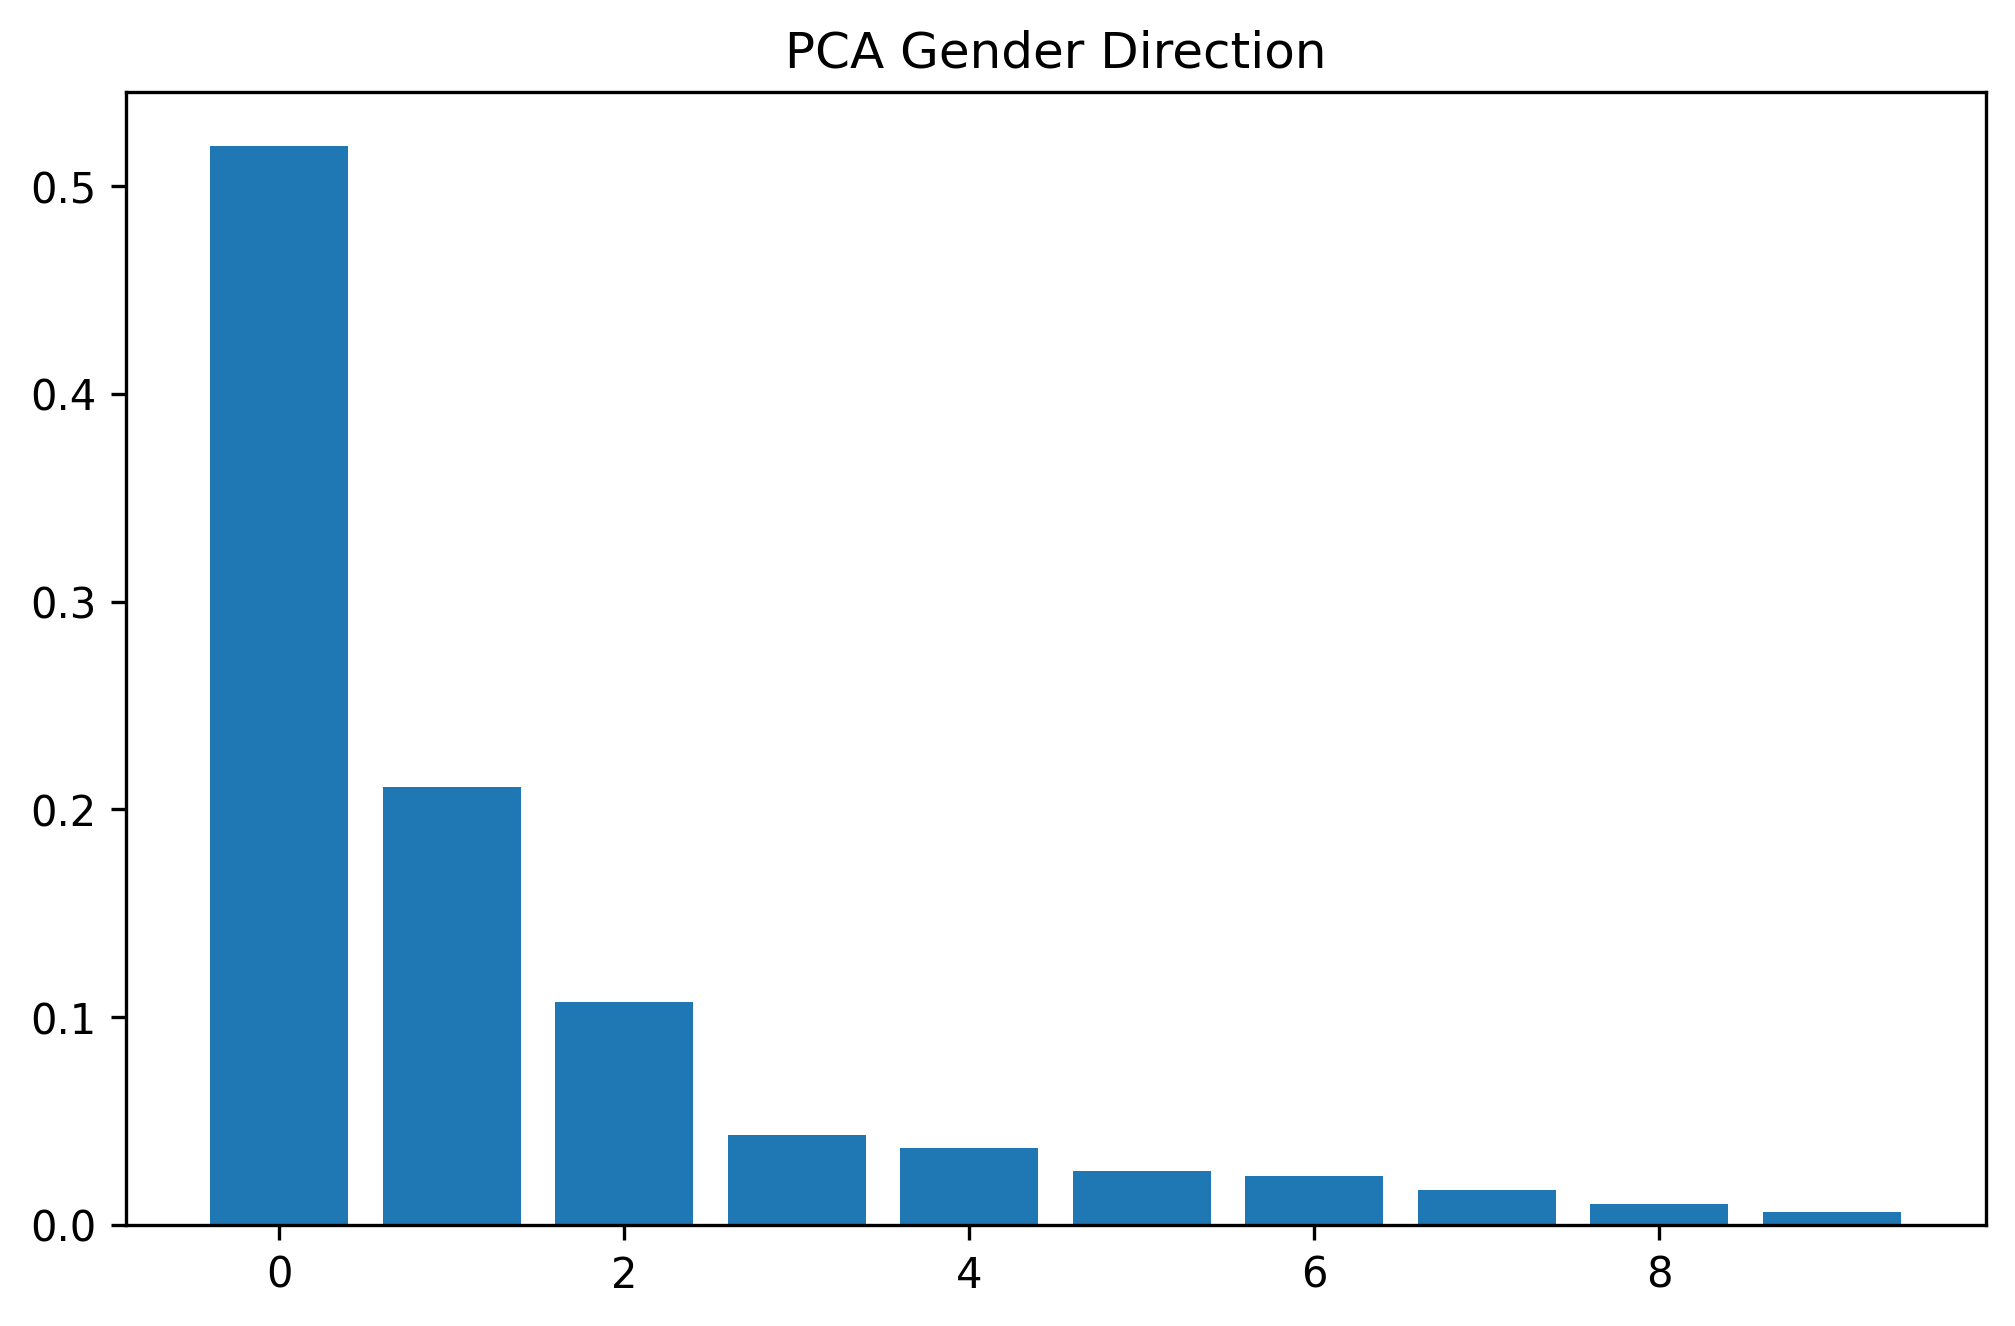

In [10]:
PCAComponents(E).run(definitional, title="PCA Gender Direction")

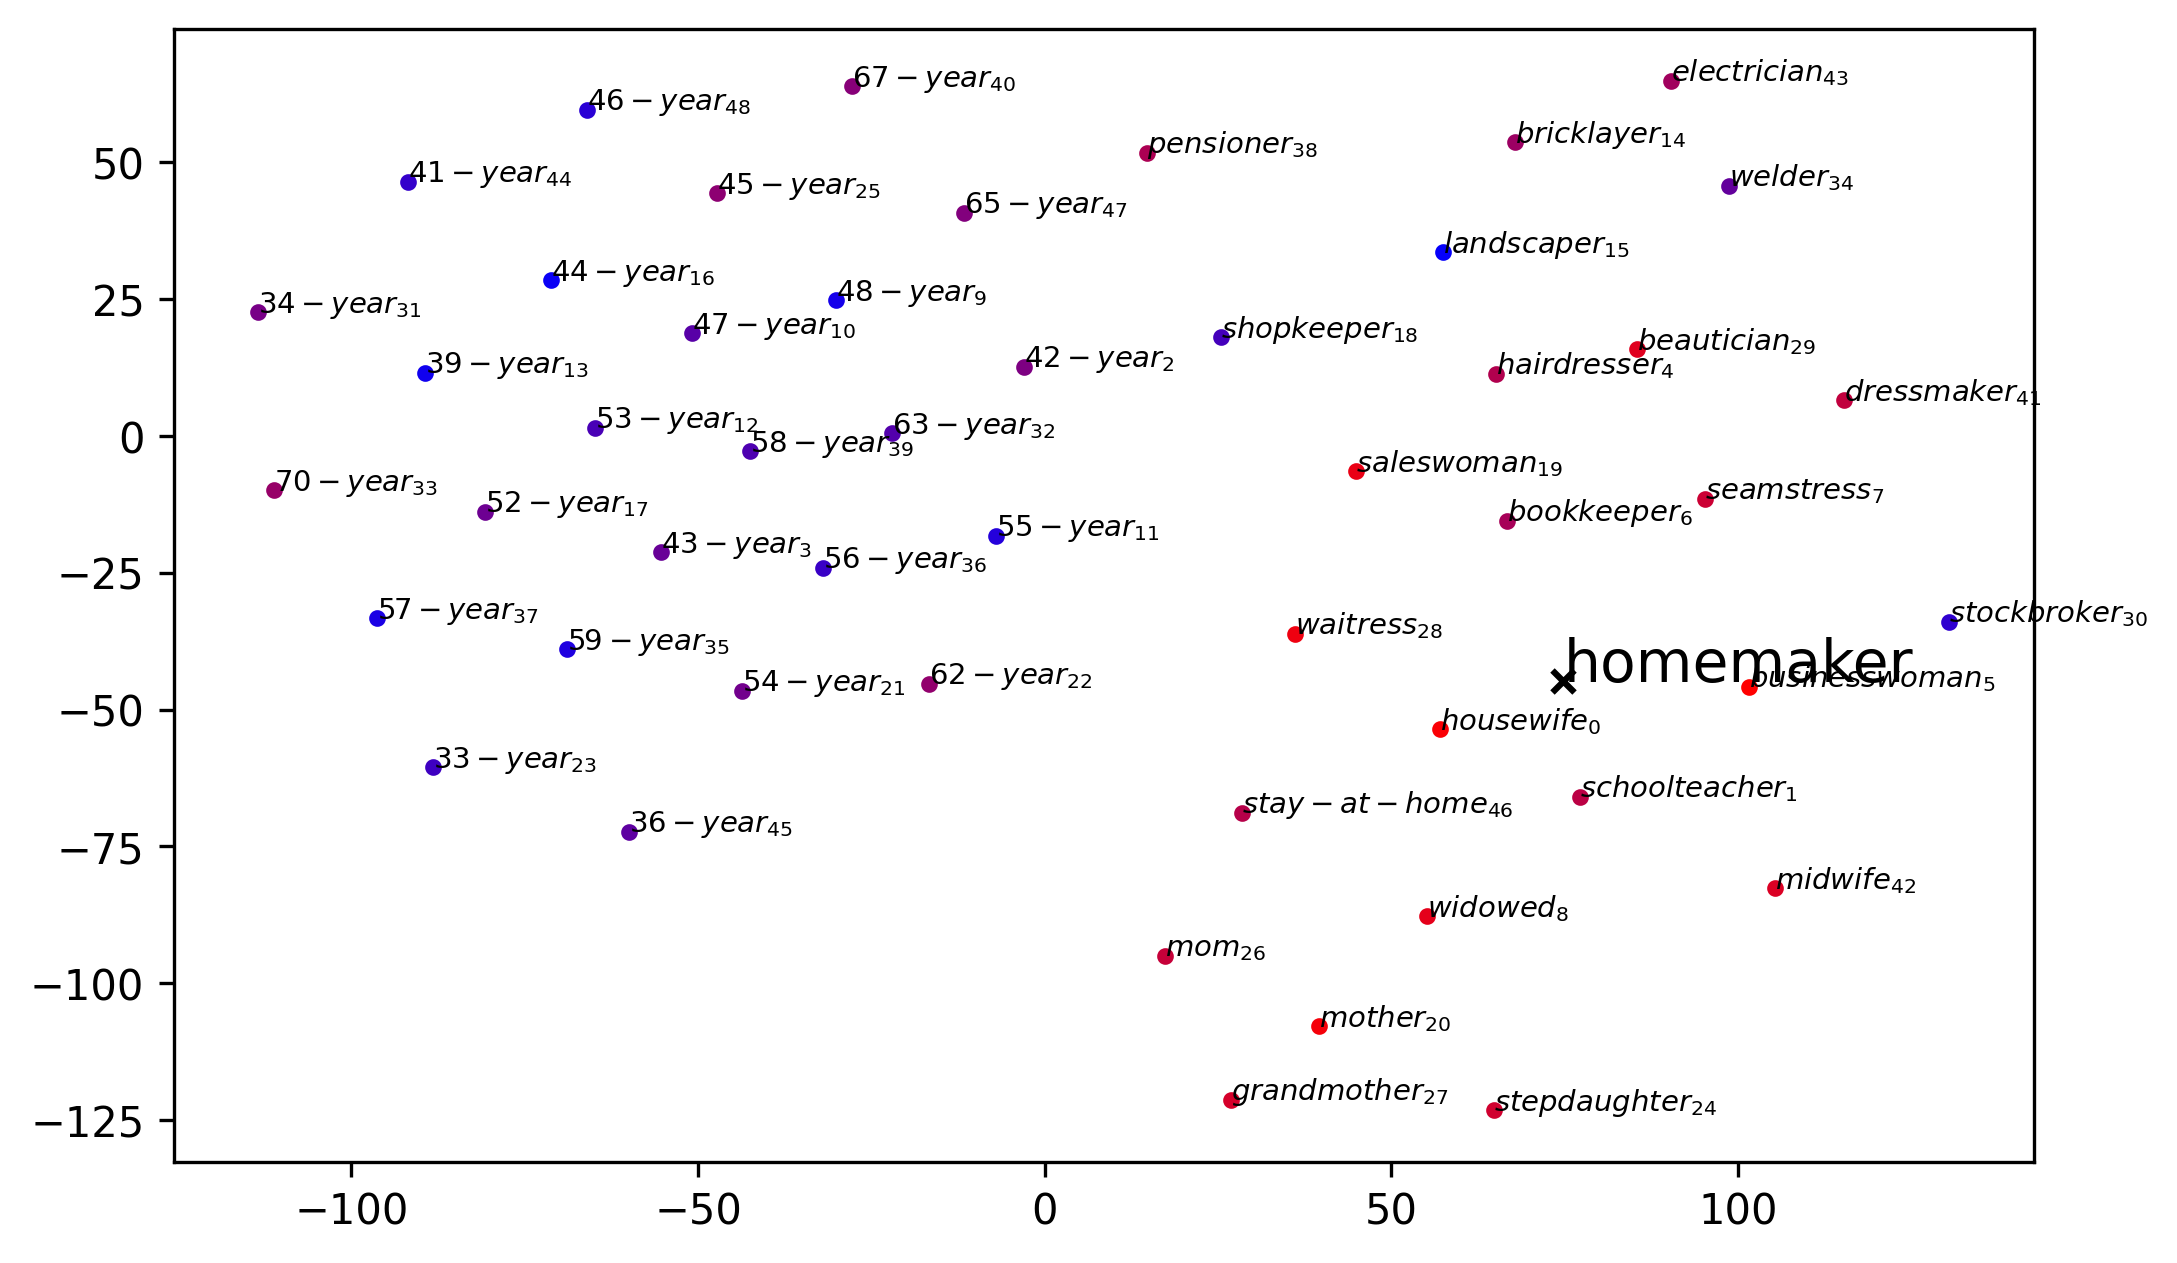

In [11]:
NeighbourPlot(E).run('homemaker', annotate=True, n=50)

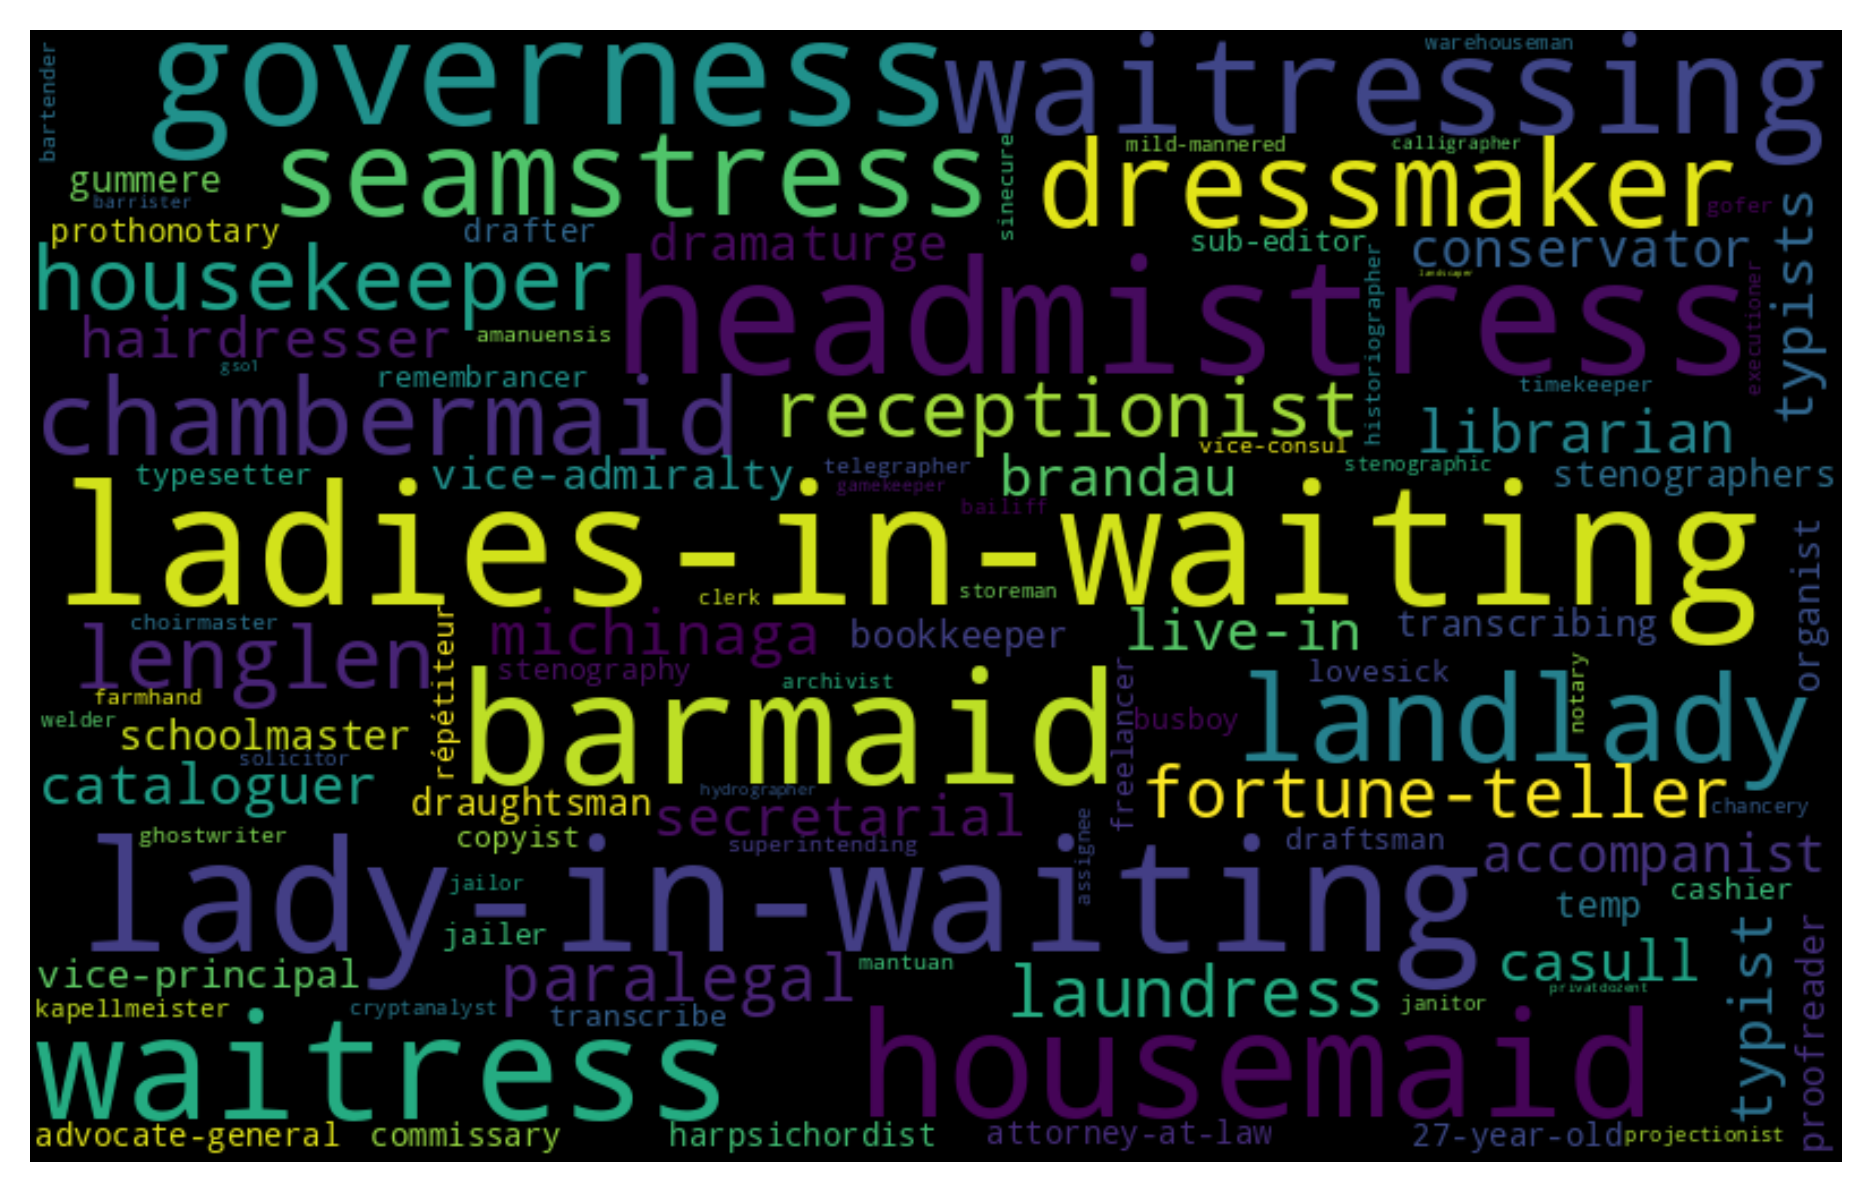

In [12]:
NBWordCloud(E).run('stenographer')

# 3. Debiasing

In [13]:
import numpy as np
import pandas as pd
import fee
import matplotlib.pyplot as plt
from fee.embedding import loader
from fee.metrics import DirectBias
from fee.debias import HardDebias, RANDebias, HSRDebias #3 debiasing methods

In [14]:
E = loader.WE().load(ename = 'glove-wiki-gigaword-300', normalize=True)
g = fee.utils.get_g(E)
E_orig = copy.deepcopy(E)

In [15]:
words = "nanny nurse warrior doctor engineer".split()
DirectBias(E_orig).compute(words)

0.14369046948850156

In [16]:
E = copy.deepcopy(E_orig)
E = HardDebias(E).run(words)
DirectBias(E).compute(words)

0.015735378302633763

In [17]:
E = copy.deepcopy(E_orig)
E = HSRDebias(E).run(words)
DirectBias(E).compute(words)

0.1418796120211482

In [18]:
E = copy.deepcopy(E_orig)
E = RANDebias(E).run(words)
DirectBias(E).compute(words)

0.01564256027340889

# 4. Metrics

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fee.embedding import loader
from fee.metrics import DirectBias, IndirectBias, GIPE, ProxBias, WEAT, PMN, SemBias #7 metrics

In [20]:
E = copy.deepcopy(E_orig)
g = fee.utils.get_g(E)

In [21]:
SemBias(E).compute() # returns #times the (definitional, ster, none) is selected

(0.7863636363636364, 0.15, 0.06363636363636363)

In [22]:
female_words = "nurse receptionist".split()
print(PMN(E).compute(female_words)) #Percentage of Male Neighbours

male_words = "engineer warrior".split()
print(PMN(E).compute(male_words)) #Percentage of Male Neighbours

16.0
78.0


In [23]:
words = female_words + male_words
DirectBias(E).compute(words)

0.17990319104865193

In [24]:
IndirectBias(E).compute('woman', 'nanny')

0.2261568

In [25]:
GIPE(E).compute(words)

0.39999999999999997

In [26]:
ProxBias(E).compute(words)

0.23500000000000001

In [27]:
attributes = ["female", "male"]
target = ["arts", "math"]

WEAT(E).compute(*attributes, *target, p_val=True) #returns (test statistic, p_value)

(0.8316222, 0.0)